# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
city_temps = []

In [60]:
import time

In [61]:
group = 1
print("Beginning Data Retrieval")
print("------------------------")
for i, cit in enumerate(cities):
    if i % 50 == 0 and i != 0:
        group += 1
    api_url = f"http://api.openweathermap.org/data/2.5/weather?q={cit}&units=imperial&appid={weather_api_key}"
    response = requests.get(api_url)
    if response.ok == True:
        response = response.json()
        city_temps.append(response)
        print(f"Processing Record {i} of Set {group} | {cit}")
    else:
        print(f"{cit} not found. Skipping...")
        
print("------------------------")
print("Endind Data Retrieval")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 0 of Set 1 | cumana
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | kahului
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | sayyan
Processing Record 6 of Set 1 | adrar
Processing Record 7 of Set 1 | leningradskiy
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | khani
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | christchurch
viligili not found. Skipping...
Processing Record 14 of Set 1 | bubaque
amderma not found. Skipping...
Processing Record 16 of Set 1 | ginda
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | carballo
Processing Record 19 of Set 1 | pocone
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | castro
Processing Record 23 of Set 1 | plettenb

In [62]:
len(city_temps)

583

In [64]:
sample_data = city_temps[:500]

In [65]:
len(sample_data)

500

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [90]:
pre_df = {"City": [], "Lat": [], "Lng": [], "Max Temp": [],
         "Humidity": [], "Cloudliness": [], 'Wind Speed': [], "Country": [],
         "Date": []}

In [91]:
for city in sample_data:
    pre_df["City"].append(city["name"])
    pre_df["Lat"].append(city["coord"]["lat"])
    pre_df["Lng"].append(city["coord"]["lon"])
    pre_df["Max Temp"].append(city["main"]["temp_max"])
    pre_df["Humidity"].append(city["main"]["humidity"])
    pre_df["Cloudliness"].append(city["clouds"]["all"])
    pre_df["Wind Speed"].append(city["wind"]["speed"])
    pre_df["Country"].append(city["sys"]["country"])
    pre_df["Date"].append(city["dt"])

In [93]:
df = pd.DataFrame.from_dict(pre_df)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudliness,Wind Speed,Country,Date
0,Cumana,10.46,-64.18,84.04,69,92,6.44,VE,1595436790
1,Saint-Philippe,-21.36,55.77,68.00,64,90,8.05,RE,1595436791
2,Puerto Ayora,-0.74,-90.35,75.20,69,75,16.11,EC,1595436296
3,Kahului,20.89,-156.47,75.00,64,1,6.93,US,1595436696
4,Ushuaia,-54.80,-68.30,35.60,74,84,3.36,AR,1595436918


In [94]:
df.to_csv("city_temperature_data.csv")

In [102]:
df.count()

City           500
Lat            500
Lng            500
Max Temp       500
Humidity       500
Cloudliness    500
Wind Speed     500
Country        500
Date           500
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [154]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudliness,Wind Speed,Date
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02
mean,20.215000,18.772100,70.166760,68.33600,50.096000,7.674900,1.595437e+09
std,33.676461,90.008391,14.698984,21.80022,36.594934,5.219705,2.103632e+02
min,-54.800000,-179.170000,26.600000,1.00000,0.000000,0.470000,1.595436e+09
25%,-8.697500,-58.195000,59.000000,55.00000,12.750000,3.850000,1.595437e+09
50%,24.250000,24.175000,71.600000,73.00000,45.000000,6.565000,1.595437e+09
75%,47.885000,94.740000,81.000000,86.00000,85.250000,10.290000,1.595437e+09
max,78.220000,179.320000,115.740000,100.00000,100.000000,28.860000,1.595437e+09


In [113]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [116]:
# Extract relevant fields from the data frame
clean_city_df = df.drop(["Lng", "Date"], axis=1)
# Export the City_Data into a csv
clean_city_df.head()
clean_city_df.to_csv("city_data_for_analysis.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [126]:
# function to plot y against x
import datetime

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature (07/22/2020)')

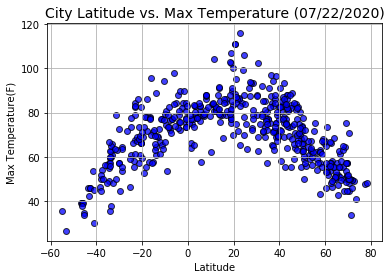

In [142]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Max Temp"], c="blue", marker="o", alpha=0.75, edgecolor = "black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs. Max Temperature (07/22/2020)", fontsize=14)

* There's an exponential relationship between Latitude and Temperature. As you move from the poles towards the equator (latitude = 0), the temperature begins to rise and converges towards a maximum of 100 degrees Farenheit. Cities in the Northern Hemisphere and near the equator (latitude > 0 and < 25) experienced higher temperatures than their Southern Hemisphere counterparts (latitudes < 0 and > -25) since they are currently in the summer season and absorb more of the sun's energy which explains the clustering of the day's highest temperatures grouped around 20 degrees latitude. 

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity Percentage (07/22/2020)')

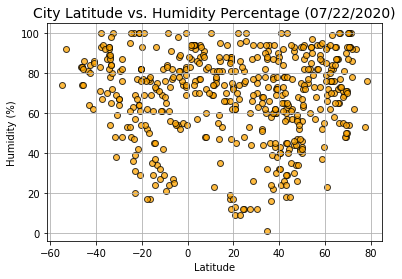

In [144]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Humidity"], c="orange", marker="o", alpha=0.75, edgecolor = "black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity Percentage (07/22/2020)", fontsize=14)

* There is no meaningful relationship between humidity percentage and latitude. The factors that influence humidity percentage must go beyond simple location on the earth such as previous rainfall and proximity to the ocean. Although there appears to be no meaningful correlation between these two variables, the density of points on the upper half of the graph could tell us that the mean humdiity percentage of our sample was above 50%.    

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (07/22/2020)')

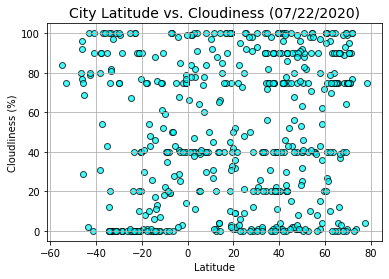

In [146]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Cloudliness"], c="aqua", marker="o", alpha=0.75, edgecolor = "black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudliness (%)")
plt.title("City Latitude vs. Cloudiness (07/22/2020)", fontsize=14)

* There is no meanigful relationship between latitude and cloudiness; the relationship appears to be less than that of latitude and humidity percentage. The clustering of data points at the y axis markers gives us a good indication that the cloudiness varaible from our API is most likely kept in units of 5 or 10. This graph also best illustrates the distribution of our sample set amongst Hemispheres. There appear to be more data points of cities from the Northern Hemisphere than the Southern Hemisphere. This uneven distribution of cities is what we should expect given that more people live in the Northern Hemisphere than in the Southern Hemisphere.  

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (07/22/2020)')

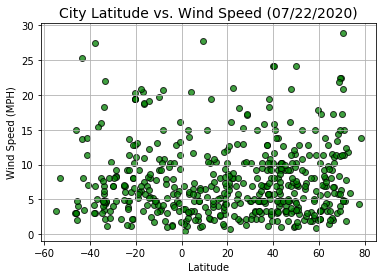

In [147]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Wind Speed"], c="green", marker="o", alpha=0.75, edgecolor = "black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("City Latitude vs. Wind Speed (07/22/2020)", fontsize=14)

* There appears to be no relationship between wind speed and latitude. The majority of our data points appear to be clustering around the range of 0 - 10 MPH, but then outliers begin to fan out toward the upper limit of 30 MPH. There is no clear pattern in the outliers. 

## Linear Regression

In [266]:
# OPTIONAL: Create a function to create Linear Regression plots
def scatter_lat(df_north, df_south, y_param, color='blue', equations_position=[(0, 40), (-20, 40)]):
    '''df_north = data frame of Northern Hemisphere Values
       df_south = data frame of Southern Hemisphere Values
       color = scatter plot points color, default blue
       equations_position = List of tuples [(x_north, y_north), (x_south, y_south)].
                            Left here to adjust stray equations.'''
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    for ax, title, df, eq_pos in zip(axes, ["Northern Hemisphere", "Southern Hemisphere"], [df_north, df_south], equations_position):
        ax.scatter(df["Lat"], df[y_param], c=color, marker="o", alpha=0.85, edgecolor = "black")
        ax.set_title(f"{title}")
        (slope, intercept, rvalue, _, _) = linregress(df["Lat"],df[y_param])
        predicted_values = df["Lat"] * slope + intercept
        equation = f"y = {round(slope, 3)}x + {round(intercept, 3)}"
        ax.plot(df["Lat"], predicted_values, "r-")
        ax.annotate(equation, eq_pos, fontsize=10, color="red")
        new_y = eq_pos[1]
        if "Wind" not in y_param:
            new_y += -5
        else:
            new_y += -2
        r_position = (eq_pos[0], new_y)
        ax.annotate(f"r = {round(rvalue, 3)}", r_position, fontsize=10, color="red")
        ax.set_ylabel(f"{y_param}")
        ax.set_xlabel("Latitude")
    fig.suptitle(f"{y_param} vs. Latitude Regression Plots", fontsize=20, y=1.03)

In [168]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = clean_city_df[clean_city_df.Lat >= 0]
southern_hemi_df = clean_city_df[clean_city_df.Lat < 0]

In [169]:
southern_hemi_df.head()

,City,Lat,Max Temp,Humidity,Cloudliness,Wind Speed,Country
1,Saint-Philippe,-21.36,68.00,64,90,8.05,RE
2,Puerto Ayora,-0.74,75.20,69,75,16.11,EC
4,Ushuaia,-54.80,35.60,74,84,3.36,AR
10,Atuona,-9.80,79.41,76,22,19.64,PF
11,Rawson,-43.30,42.35,64,100,13.71,AR


In [170]:
northern_hemi_df.tail()

,City,Lat,Max Temp,Humidity,Cloudliness,Wind Speed,Country
489,Teya,60.38,53.38,92,100,2.10,RU
490,Altay,47.87,63.12,59,88,3.71,CN
493,Mīrābād,30.44,87.44,12,0,2.13,AF
494,Kadoshkino,54.03,64.18,85,71,6.98,RU
499,Cochrane,51.18,72.00,72,1,12.75,CA


#### Temperature

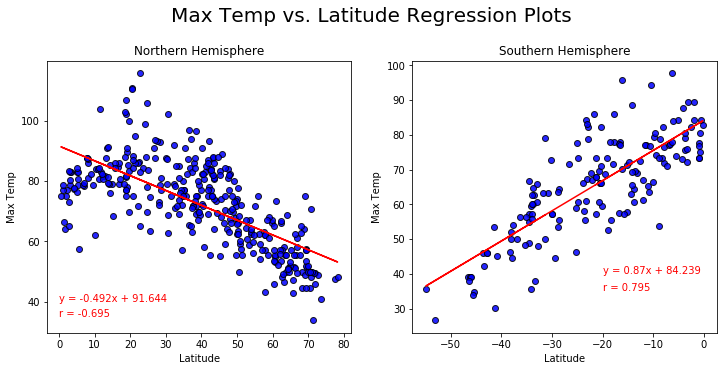

In [234]:
scatter_lat(northern_hemi_df, southern_hemi_df, "Max Temp")

* These regression plots both show that as latitude moves towards 0 (and towards the equator) Temperature increases. The difference in the plot's equations can be understood by seasonality, sample size and sample ranges. The average temperature in Fahrenheit for a city on the equator in the Northern Hemisphere is 91.644 degrees. The average temperature in Fahrenheit for a city on the equator in the Southern Hemisphere is 84.239 degrees. As mentioned above, since the Northern Hemisphere is in the summer season, we should expect the temperatures in this Hemisphere to be higher, everything else being equal.

* That solves the constant question, but why is the slope of the Southern Hemisphere almost twice of that as the Northern Hemisphere's, 0.87 and 0.492 respectively? This can be explained by looking at the limits of the x-axis of both plots and by referring back to the dynamics of population distribution referenced above. The latitude range for the Northern Hemisphere is (0, 80) and the Southern Hemisphere's is (0, -55). There is more land in the Northern Hemisphere, so there are more cities spread across this land and closer to the pole (closer to 90). Since the Northern Hemisphere's regression equation has to deal with more cities who are spread across a wider range of latitude values, its slope coefficent is going to be smaller and its accuracy (r) will also be smaller.

#### Humidity (%)

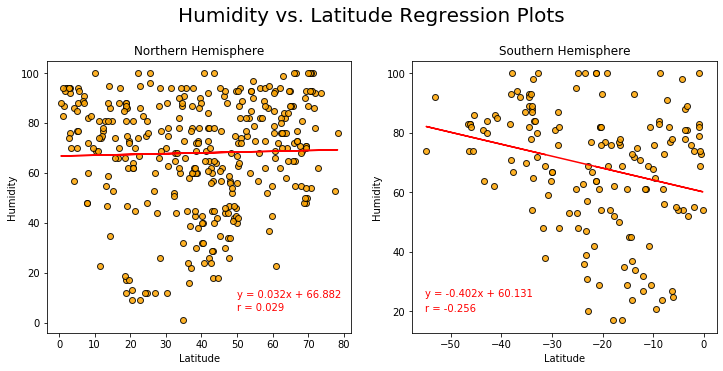

In [259]:
scatter_lat(northern_hemi_df, southern_hemi_df, "Humidity", "orange", [(50, 10), (-55, 25)])

* There appears to be no relationship between humidity and latitude. The Southern Hemisphere has a slightly useful correlation coefficient, but this could be due to fact that the sample of cities in this region was smaller than the Northern Hemisphere. The lack of data around toward lower latitudes (less than -40) leads me to be believe than any slight relationship that appears to be present now would dissipate if we had humidity data from the same range latitude range as the Northern Hemisphere.

#### Cloudiness(%)

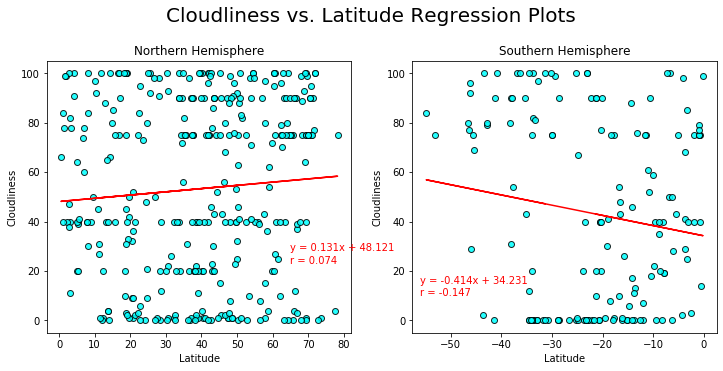

In [260]:
scatter_lat(northern_hemi_df, southern_hemi_df, "Cloudliness", "cyan", [(65, 28), (-56, 15)])

* There is no relationship between latitude and cloudiness. Cloud formation, similar to humidity, is a climate condition that appears to not be affected by a city's position on the Earth. 

#### Wind Speed (%)

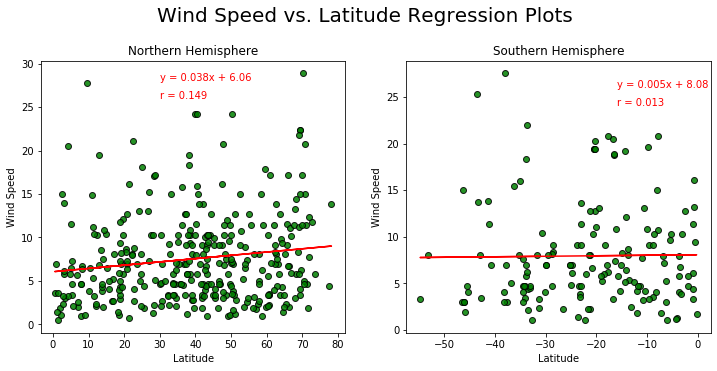

In [273]:
scatter_lat(northern_hemi_df, southern_hemi_df, "Wind Speed", "green", [(30, 28), (-16, 26)])

* There is no relationship between wind speed and latitude. All of the above climate factors have no meaningful relationship with latitude (except for temperature) in either Hemisphere. Latitude can give you a general idea about the nature of a city's temperature as you move toward the equator and away from the poles (or vice versa), but it provides little better than a random guess when trying to predict other features of a city's climate.